Assessment_Big Data_Data -- Samiksha Ingole

In [ ]:
!apt-get install openjdk-8-jdk-headless

In [2]:
!wget https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz

--2023-05-18 17:05:30--  https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 138.201.131.134, 2a01:4f8:172:2ec5::2
Connecting to archive.apache.org (archive.apache.org)|138.201.131.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272637746 (260M) [application/x-gzip]
Saving to: ‘spark-3.2.1-bin-hadoop2.7.tgz’

spark-3.2.1-bin-had 100%[===================>] 260.01M   458KB/s    in 7m 33s  

2023-05-18 17:13:03 (588 KB/s) - ‘spark-3.2.1-bin-hadoop2.7.tgz’ saved [272637746/272637746]



In [3]:
!tar xf /content/spark-3.2.1-bin-hadoop2.7.tgz

In [4]:
!pip install -q findspark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=5fddaeec315168bbc679b4956ef7c1ae96ed2fed8e2cd671f43c9dcfaf25d36a
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [5]:
import os

os.environ["JAVA_HOME"] =  "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"


import findspark

findspark.init()
findspark.find()


'/content/spark-3.2.1-bin-hadoop2.7'

In [6]:
import pyspark
sc = pyspark.SparkContext(master="local[*]", appName="FirstExample")

In [7]:
sc.setLogLevel("ERROR")

In [8]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local").appName("assessment_bigdata").config("spark.ui.port", "4050").getOrCreate()

In [9]:
spark

Exloratory Data Analysis using spark

data loading and cleaning

In [10]:

buy_clicks_data = spark.read.csv("/content/buy-clicks.csv", header=True, inferSchema=True)
ad_clicks_data = spark.read.csv("/content/ad-clicks.csv", header=True, inferSchema=True)
game_clicks_data=spark.read.csv("/content/game-clicks.csv", header=True, inferSchema=True)
level_events_data=spark.read.csv("/content/level-events.csv", header=True, inferSchema=True)
team_assignments_data=spark.read.csv("/content/team-assignments.csv", header=True, inferSchema=True)
team_data=spark.read.csv("/content/team.csv", header=True, inferSchema=True)
user_session_data=spark.read.csv("/content/user-session.csv", header=True, inferSchema=True)
users_data=spark.read.csv("/content/users.csv", header=True, inferSchema=True)

In [11]:
buy_clicks_data.show(10)

+-------------------+----+-------------+----+------+-----+-----+
|          timestamp|txId|userSessionId|team|userId|buyId|price|
+-------------------+----+-------------+----+------+-----+-----+
|2016-05-26 15:36:54|6004|         5820|   9|  1300|    2|  3.0|
|2016-05-26 15:36:54|6005|         5775|  35|   868|    4| 10.0|
|2016-05-26 15:36:54|6006|         5679|  97|   819|    5| 20.0|
|2016-05-26 16:36:54|6067|         5665|  18|   121|    2|  3.0|
|2016-05-26 17:06:54|6093|         5709|  11|  2222|    5| 20.0|
|2016-05-26 17:06:54|6094|         5798|  77|  1304|    5| 20.0|
|2016-05-26 18:06:54|6155|         5920|   9|  1027|    5| 20.0|
|2016-05-26 18:06:54|6156|         5697|  35|  2199|    2|  3.0|
|2016-05-26 18:36:54|6183|         5893|  64|  1544|    5| 20.0|
|2016-05-26 18:36:54|6184|         5697|  35|  2199|    1|  2.0|
+-------------------+----+-------------+----+------+-----+-----+
only showing top 10 rows



In [12]:
ad_clicks_data.show(10)

+-------------------+----+-------------+------+------+----+-----------+
|          timestamp|txId|userSessionId|teamId|userId|adId| adCategory|
+-------------------+----+-------------+------+------+----+-----------+
|2016-05-26 15:13:22|5974|         5809|    27|   611|   2|electronics|
|2016-05-26 15:17:24|5976|         5705|    18|  1874|  21|     movies|
|2016-05-26 15:22:52|5978|         5791|    53|  2139|  25|  computers|
|2016-05-26 15:22:57|5973|         5756|    63|   212|  10|    fashion|
|2016-05-26 15:22:58|5980|         5920|     9|  1027|  20|   clothing|
|2016-05-26 15:27:19|5977|         5954|    77|   595|   4|      games|
|2016-05-26 15:28:51|5981|         5674|    54|   770|   6|     movies|
|2016-05-26 15:35:25|5975|         5919|    59|  2133|   3|electronics|
|2016-05-26 15:35:37|5979|         5945|    75|   253|   3|electronics|
|2016-05-26 15:36:38|5972|         5914|    78|  1821|  12|  computers|
+-------------------+----+-------------+------+------+----+-----

In [13]:
game_clicks_data.show(10)

+-------------------+-------+------+-------------+-----+------+---------+
|          timestamp|clickId|userId|userSessionId|isHit|teamId|teamLevel|
+-------------------+-------+------+-------------+-----+------+---------+
|2016-05-26 15:06:55|    105|  1038|         5916|    0|    25|        1|
|2016-05-26 15:07:09|    154|  1099|         5898|    0|    44|        1|
|2016-05-26 15:07:14|    229|   899|         5757|    0|    71|        1|
|2016-05-26 15:07:14|    322|  2197|         5854|    0|    99|        1|
|2016-05-26 15:07:20|     22|  1362|         5739|    0|    13|        1|
|2016-05-26 15:07:27|    107|  1071|         5939|    0|    27|        1|
|2016-05-26 15:07:30|    289|  2359|         5764|    0|    85|        1|
|2016-05-26 15:07:30|    301|  1243|         5900|    0|    86|        1|
|2016-05-26 15:07:47|    274|  1628|         5896|    0|    82|        1|
|2016-05-26 15:07:48|     66|   453|         5662|    0|    20|        1|
+-------------------+-------+------+--

In [14]:
level_events_data.show(10)

+-------------------+-------+------+---------+---------+
|          timestamp|eventId|teamId|teamLevel|eventType|
+-------------------+-------+------+---------+---------+
|2016-05-27 23:06:54|      0|     2|        1|      end|
|2016-05-27 23:06:54|      1|     2|        2|    start|
|2016-05-27 23:06:54|      2|     8|        1|      end|
|2016-05-27 23:06:54|      3|     8|        2|    start|
|2016-05-27 23:06:54|      4|     9|        1|      end|
|2016-05-27 23:06:54|      5|     9|        2|    start|
|2016-05-27 23:06:54|      6|    11|        1|      end|
|2016-05-27 23:06:54|      7|    11|        2|    start|
|2016-05-27 23:06:54|      8|    13|        1|      end|
|2016-05-27 23:06:54|      9|    13|        2|    start|
+-------------------+-------+------+---------+---------+
only showing top 10 rows



In [15]:
team_assignments_data.show(10)

+-------------------+----+------+------------+
|          timestamp|team|userId|assignmentId|
+-------------------+----+------+------------+
|2016-05-26 14:06:54|  64|   504|        5439|
|2016-05-26 14:07:00|  39|  1698|        5301|
|2016-05-26 14:07:04|  85|    81|        5540|
|2016-05-26 14:07:08|  95|  1976|        5307|
|2016-05-26 14:07:09|  97|  1009|        5368|
|2016-05-26 14:07:13|  39|  1208|        5298|
|2016-05-26 14:07:17|  70|  1665|        5011|
|2016-05-26 14:07:20|  18|   665|        5235|
|2016-05-26 14:07:20|  44|  1962|        5058|
|2016-05-26 14:07:21|  59|   801|        5170|
+-------------------+----+------+------------+
only showing top 10 rows



In [16]:
team_data.show(10)

+------+----------+-------------------+-------------------+--------------+------------+
|teamId|      name|   teamCreationTime|        teamEndTime|      strength|currentLevel|
+------+----------+-------------------+-------------------+--------------+------------+
|    79|   O1uJX7C|2016-06-12 15:33:27|9999-12-31 23:59:59|0.774473575316|           1|
|    92|  WeLHp8HZ|2016-06-12 21:54:20|9999-12-31 23:59:59| 0.17192602642|           1|
|     6|    mARlfz|2016-06-12 23:02:16|9999-12-31 23:59:59|0.537353043526|           1|
|     7|xO41jlAo0Y|2016-06-13 06:03:03|9999-12-31 23:59:59|0.394370370549|           1|
|    40|   vdwO0k1|2016-06-13 07:01:03|9999-12-31 23:59:59|0.706832959169|           1|
|    18| VpF5Lrtz7|2016-06-13 12:23:36|9999-12-31 23:59:59|0.885469892018|           1|
|    91| 8brfgFZi6|2016-06-13 12:33:58|9999-12-31 23:59:59|0.478092156292|           1|
|    90| 0sicoF7Pl|2016-06-13 13:06:10|9999-12-31 23:59:59|0.443162418548|           1|
|    78|eGBdAiM6ti|2016-06-13 13

In [17]:
users_data.show(10)

+-------------------+------+-----------+----------+----------+-------+
|          timestamp|userId|       nick|   twitter|       dob|country|
+-------------------+------+-----------+----------+----------+-------+
|2012-06-19 14:53:41|   442|   pcjIOBKW|  @SZhyOHv|1994-07-20|     BA|
|2012-06-19 19:29:01|   949|    vAOfUkf|    @nkkNo|1971-04-22|     HU|
|2012-06-20 19:34:59|  1654|     qOOXSQ|    @SwOlw|1970-04-19|     IS|
|2012-06-21 01:18:29|  1586|    px4gW51|  @IrCHTnE|1965-11-23|     AM|
|2012-06-21 15:35:00|   599|9gkfwRC73Uc|   @VJj0Az|1994-08-23|     CC|
|2012-06-22 11:36:19|   952| BRbb3VOTti|   @b4OK6K|1986-09-11|     MH|
|2012-06-23 08:11:18|  1056|    fGCIAtI| @IgDsdWdU|1991-11-28|     SM|
|2012-06-23 10:54:19|    91|tpDfgi3S0N9|   @LvTHGO|1977-07-03|     BZ|
|2012-06-23 14:59:26|   809| LkNRpRW6Ez|@ROrRkXwdh|1951-09-25|     PF|
|2012-06-23 17:40:35|    75|     fNWewX|   @OXqLyv|1979-11-12|     JO|
+-------------------+------+-----------+----------+----------+-------+
only s

In [18]:
user_session_data.show(10)

+-------------------+-------------+------+------+------------+-----------+---------+------------+
|          timestamp|userSessionId|userId|teamId|assignmentId|sessionType|teamLevel|platformType|
+-------------------+-------------+------+------+------------+-----------+---------+------------+
|2016-05-26 14:47:30|         5675|   170|    90|        5423|      start|        1|      iphone|
|2016-05-27 00:06:54|         5675|   170|    90|        5423|        end|        1|      iphone|
|2016-05-26 14:43:09|         5795|   835|    39|        5300|      start|        1|     android|
|2016-05-27 08:06:54|         5795|   835|    39|        5300|        end|        1|     android|
|2016-05-26 14:47:20|         5833|   624|     2|        5529|      start|        1|      iphone|
|2016-05-27 23:06:54|         5833|   624|     2|        5529|        end|        1|      iphone|
|2016-05-26 14:37:33|         5877|   514|     2|        5528|      start|        1|     windows|
|2016-05-27 23:06:54

In [19]:
buy_clicks_data.printSchema()

root
 |-- timestamp: string (nullable = true)
 |-- txId: integer (nullable = true)
 |-- userSessionId: integer (nullable = true)
 |-- team: integer (nullable = true)
 |-- userId: integer (nullable = true)
 |-- buyId: integer (nullable = true)
 |-- price: double (nullable = true)



In [20]:
buy_clicks_data.count()

2947

In [21]:
ad_clicks_data.printSchema()

root
 |-- timestamp: string (nullable = true)
 |-- txId: integer (nullable = true)
 |-- userSessionId: integer (nullable = true)
 |-- teamId: integer (nullable = true)
 |-- userId: integer (nullable = true)
 |-- adId: integer (nullable = true)
 |-- adCategory: string (nullable = true)



Removing null values

In [22]:
buy_clicks_data = buy_clicks_data.na.drop()
ad_clicks_data=ad_clicks_data.na.drop()
game_clicks_data=game_clicks_data.na.drop()
level_events_data=level_events_data.na.drop()
team_assignments_data=team_assignments_data.na.drop()
team_data=team_data.na.drop()
user_session_data=user_session_data.na.drop()
users_data=users_data.na.drop()

In [23]:
####Adding AGE column in user data based on DOB

from pyspark.sql import functions as f
users_data = users_data.withColumn("age", (f.months_between(f.current_date(), f.col('dob')) / 12).cast('int'))
users_data.show(5)

+-------------------+------+-----------+--------+----------+-------+---+
|          timestamp|userId|       nick| twitter|       dob|country|age|
+-------------------+------+-----------+--------+----------+-------+---+
|2012-06-19 14:53:41|   442|   pcjIOBKW|@SZhyOHv|1994-07-20|     BA| 28|
|2012-06-19 19:29:01|   949|    vAOfUkf|  @nkkNo|1971-04-22|     HU| 52|
|2012-06-20 19:34:59|  1654|     qOOXSQ|  @SwOlw|1970-04-19|     IS| 53|
|2012-06-21 01:18:29|  1586|    px4gW51|@IrCHTnE|1965-11-23|     AM| 57|
|2012-06-21 15:35:00|   599|9gkfwRC73Uc| @VJj0Az|1994-08-23|     CC| 28|
+-------------------+------+-----------+--------+----------+-------+---+
only showing top 5 rows



In [24]:
from pyspark.sql.functions import udf

age_range = udf(lambda age: '< 20' if age < 20 else 
                       '20-29' if (age >= 20 and age < 30) else
                       '30-39' if (age >= 30 and age < 40) else
                       '40-49' if (age >= 40 and age < 50) else        
                       '50-59' if (age >= 50 and age < 60) else
                       '60-70' if (age >= 60 and age < 70) else
                       '70-79' if (age >= 70 and age < 79) else
                       '80-100' if (age >= 80 and age < 101)  else ""    
                       )

users_data = users_data.withColumn('age_group', age_range(users_data.age))
users_data.show()


+-------------------+------+-----------+----------+----------+-------+---+---------+
|          timestamp|userId|       nick|   twitter|       dob|country|age|age_group|
+-------------------+------+-----------+----------+----------+-------+---+---------+
|2012-06-19 14:53:41|   442|   pcjIOBKW|  @SZhyOHv|1994-07-20|     BA| 28|    20-29|
|2012-06-19 19:29:01|   949|    vAOfUkf|    @nkkNo|1971-04-22|     HU| 52|    50-59|
|2012-06-20 19:34:59|  1654|     qOOXSQ|    @SwOlw|1970-04-19|     IS| 53|    50-59|
|2012-06-21 01:18:29|  1586|    px4gW51|  @IrCHTnE|1965-11-23|     AM| 57|    50-59|
|2012-06-21 15:35:00|   599|9gkfwRC73Uc|   @VJj0Az|1994-08-23|     CC| 28|    20-29|
|2012-06-22 11:36:19|   952| BRbb3VOTti|   @b4OK6K|1986-09-11|     MH| 36|    30-39|
|2012-06-23 08:11:18|  1056|    fGCIAtI| @IgDsdWdU|1991-11-28|     SM| 31|    30-39|
|2012-06-23 10:54:19|    91|tpDfgi3S0N9|   @LvTHGO|1977-07-03|     BZ| 45|    40-49|
|2012-06-23 14:59:26|   809| LkNRpRW6Ez|@ROrRkXwdh|1951-09-25|   

In [25]:
data = users_data.toPandas()
data.loc[data['age']<=19, 'age_group'] = 'teenage'
data.loc[data['age'].between(20,35), 'age_group'] = '20-35'
data.loc[data['age'].between(36,50), 'age_group'] = '36-50'
data.loc[data['age'].between(51,65), 'age_group'] = '51-65'
data.loc[data['age'].between(66,100), 'age_group'] = '66-100'

+---------+---------------+
|age_group|age_group_count|
+---------+---------------+
|    20-29|            310|
|    30-39|            602|
|    40-49|            552|
|    50-59|            431|
|    60-70|            326|
|    70-79|            172|
+---------+---------------+



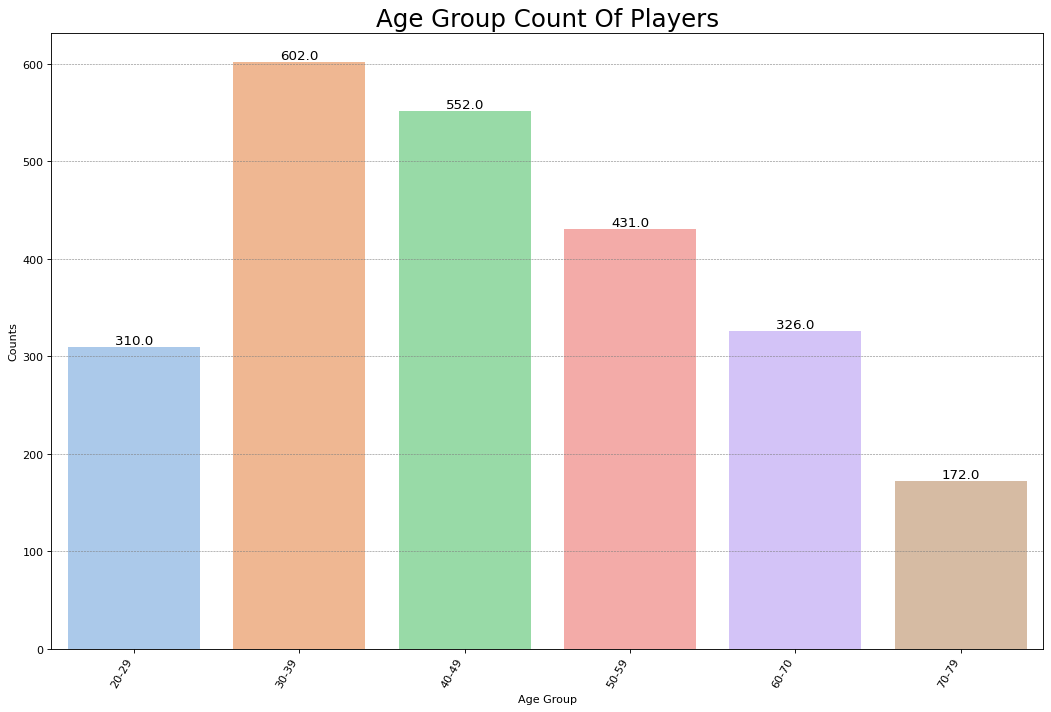

In [27]:
from pyspark.sql import Window
from pyspark.sql.functions import rank,sum,col
import pyspark.sql.functions as f


window = Window.rowsBetween(Window.unboundedPreceding,Window.unboundedFollowing)
w = Window.partitionBy('x')
users_data_group = users_data.groupBy('age_group').count()\
        .select('age_group', f.col('count').alias('age_group_count'))\
        .sort(f.asc("age_group")) 

users_data_group.show()

import matplotlib.pyplot as plt
import seaborn as sns
import random

# Import Data
df_raw = users_data_group 

# Prepare Data
df = users_data_group.toPandas()
n = users_data_group["age_group"].size+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=7)

# Plot Bars
pastel_colors = sns.color_palette("pastel")
plt.figure(figsize=(16,10), dpi= 80)
ax = sns.barplot(x="age_group", y="age_group_count", data=df, palette=pastel_colors)
ax.yaxis.grid(True, linestyle='dashed', linewidth=0.5, color='gray')
for i, val in enumerate(df['age_group_count'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})


plt.gca().set_xticklabels(df['age_group'], rotation=60, horizontalalignment= 'right')
plt.title("Age Group Count Of Players", fontsize=22)
plt.ylabel('Counts')
plt.xlabel('Age Group')
plt.show()




In [28]:
import pyspark.sql.functions as F
import plotly.graph_objs as go
from plotly.offline import plot

# Aggregate the user data by country
user_data_by_country = users_data.groupBy("country").agg(F.count("userId").alias("num_users"))
user_data_by_country=user_data_by_country.toPandas()

heatmap_trace = go.Choropleth(
    locations=user_data_by_country["country"].tolist(),
    z=user_data_by_country["num_users"],
    text=user_data_by_country["country"],
    colorscale="Reds",
    autocolorscale=True,
    reversescale=True,
    marker_line_color="white",
    colorbar={"title": "Number of Users"}
)

layout = go.Layout(
    title="User Distribution by Country",
    geo={"showframe": False}
)


fig = go.Figure(data=[heatmap_trace], layout=layout)
plot(fig, filename="user_distribution.html")


'user_distribution.html'

In [ ]:
user_data_by_country

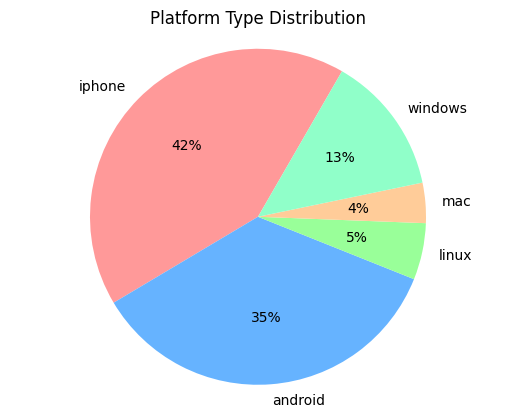

In [30]:
platform_counts = user_session_data.groupBy('platformType') \
    .agg(F.count('*').alias('count'))

# Convert the result to a pandas DataFrame
platform_counts_pd = platform_counts.toPandas()

# labels and colors for the pie chart
labels = platform_counts_pd['platformType']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#90ffc9']

# pie chart
plt.pie(platform_counts_pd['count'], labels=labels, colors=colors, autopct='%1.0f%%', startangle=60)
plt.title('Platform Type Distribution')

plt.rcParams['font.size'] = 10
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().axis('equal')

plt.show()

Times Series of ad clicks per day

In [31]:
from pyspark.sql.functions import to_timestamp
df = ad_clicks_data.withColumn("timestamp", to_timestamp("timestamp", "dd-MM-yyyy HH:mm:ss"))

In [32]:
from pyspark.sql.functions import date_format
df = df.groupBy(date_format("timestamp", "yyyy-MM-dd").alias("day")).count()


In [ ]:
plt.figure(figsize=(20,20))
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# adclicks_df.groupby("adCategory").count().orderBy("count").show()
ad_clicks_data.withColumn("tstamp",f.date_format(ad_clicks_data.timestamp,'yyyy-MM-dd') )\
.withColumn("hstamp",f.date_format(ad_clicks_data.timestamp,'hh:mm:ss') )\
.withColumn("month",f.date_format(ad_clicks_data.timestamp,'yyyy-MM-dd') )\
.select("month")\
.groupBy("month")\
.count()\
.orderBy("count")\
.toPandas()\
.plot.line(x="month", y="count", xlabel="Days", ylabel="Ads clicked", title="Time Series of Adclick per Day",color="red", grid=True)


In [36]:
team_buying_df = team_data.alias("teamdf").join(buy_clicks_data.alias("buyclicks"),\
                            f.col("teamdf.teamId") == f.col("buyclicks.team"),"inner")


In [37]:
# TEAM SPENDING WITH AGE GROUP
team_user_buying_df = team_buying_df.alias("team_buying_df").join(users_data.alias("users_df"),\
                           f.col("team_buying_df.userId") == f.col("users_df.userId"),"inner")

In [ ]:
!pip install pycountry_convert

In [ ]:
import pycountry_convert as pc
from pyspark.sql.types import StringType

def country_to_continent(country_name):
  try:
    country_continent_code = pc.country_alpha2_to_continent_code(country_name)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name
  except:
    return "None"

udf_country_to_continent = f.udf(country_to_continent , StringType())
team_user_buying_df = team_user_buying_df.withColumn("continent", udf_country_to_continent(f.col("country") ))

team_user_buying_df.show()

In [ ]:
team_user_buying_df

In [42]:
from pyspark.sql import Window
from pyspark.sql.functions import rank,sum,col


window = Window.rowsBetween(Window.unboundedPreceding,Window.unboundedFollowing)

team_user_buying_df_stat = team_user_buying_df.groupby("continent").agg(f.sum('price').alias('spending_count'),
                                        f.mean('price').alias('price_avg'),
                                        f.min('price').alias('price_min'),
                                        f.max('price').alias('price_max')).\
   withColumn('total',sum(f.col('spending_count')).over(window)).\
   withColumn('Percent',f.col('spending_count')*100/f.col('total'))
team_user_buying_df_stat.show()

+-------------+--------------+------------------+---------+---------+-------+------------------+
|    continent|spending_count|         price_avg|price_min|price_max|  total|           Percent|
+-------------+--------------+------------------+---------+---------+-------+------------------+
|         None|         684.0|              11.4|      1.0|     20.0|16576.0| 4.126447876447877|
|       Europe|        2974.0| 7.548223350253807|      1.0|     20.0|16576.0|17.941602316602317|
|       Africa|        3889.0| 7.282771535580524|      1.0|     20.0|16576.0|23.461631274131275|
|North America|        2726.0| 7.593314763231198|      1.0|     20.0|16576.0|16.445463320463322|
|   Antarctica|          51.0|             2.125|      1.0|     10.0|16576.0|0.3076737451737452|
|South America|        1416.0|10.114285714285714|      1.0|     20.0|16576.0| 8.542471042471043|
|      Oceania|        1410.0| 5.802469135802469|      1.0|     20.0|16576.0|  8.50627413127413|
|         Asia|        3426.0|

In [43]:
team_user_buying_df_stat1=team_user_buying_df_stat.where(team_user_buying_df_stat.continent!='None')


In [ ]:
team_user_buying_df_stat1.show(10)

In [45]:
df_pd = team_user_buying_df_stat1.toPandas()

#pie chart
fig = px.pie(df_pd, values='Percent', names='continent', title='Continent-wise spending percentage',hole=.4)
fig.show()

In [46]:
team_buying_df_grouped = team_buying_df.groupBy("teamId").sum("price", "strength")\
         .select('teamId', f.col('sum(price)').alias('total_spending'), f.col('sum(strength)').alias('total_strength'))\
         .orderBy("sum(price)")

In [ ]:
team_buying_df_grouped.show()

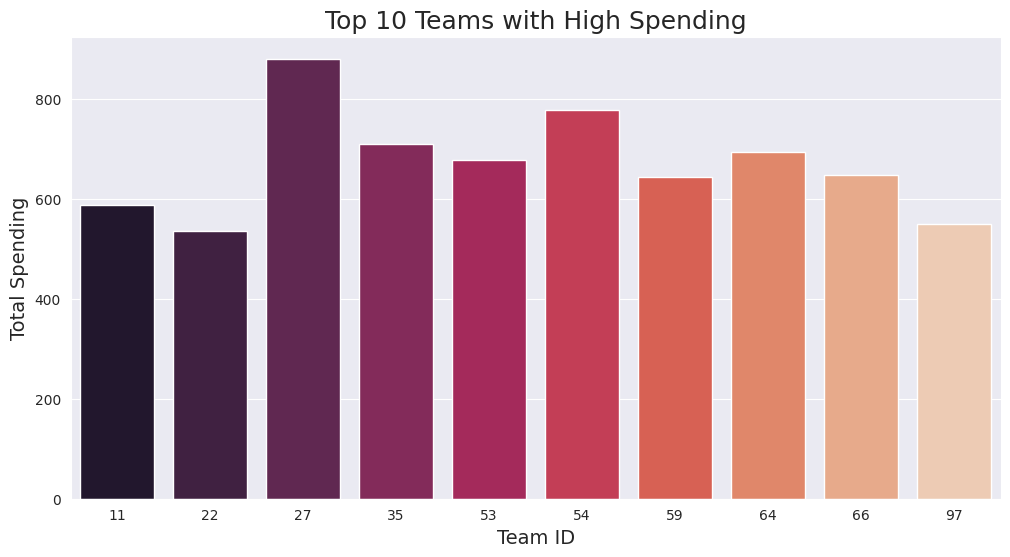

In [48]:
import pyspark.sql.functions as F
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# convert the spark dataframe to a pandas dataframe
df = team_buying_df_grouped.toPandas()

# create a dataframe with top 10 teams with high spending
top10_teams = df.sort_values('total_spending', ascending=False).head(10)

# create a barplot with seaborn
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
sns.barplot(data=top10_teams, x='teamId', y='total_spending', palette='rocket')
plt.title("Top 10 Teams with High Spending", fontsize=18)
plt.xlabel("Team ID", fontsize=14)
plt.ylabel("Total Spending", fontsize=14)
plt.show()

In [49]:
df_plays_by_team = user_session_data.groupBy("teamLevel").agg(F.count("userID").alias("total_plays"))

# Sorting total players
df_plays_by_team = df_plays_by_team.sort("total_plays", ascending=False)
team_levels = df_plays_by_team.select("teamLevel").rdd.flatMap(lambda x: x).collect()
total_plays = df_plays_by_team.select("total_plays").rdd.flatMap(lambda x: x).collect()


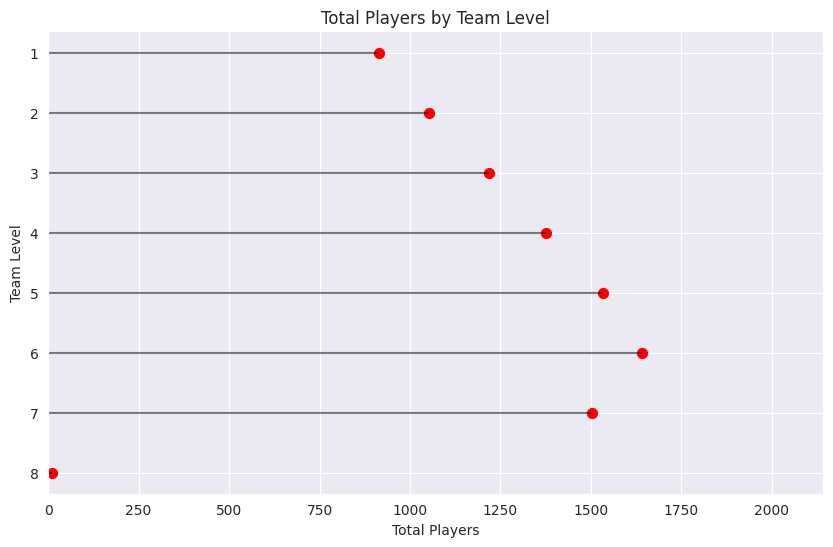

In [51]:
#Total players by team

fig, ax = plt.subplots(figsize=(10, 6))
ax.hlines(y=team_levels, xmin=0, xmax=total_plays, color='black', alpha=0.5)
ax.scatter(total_plays, team_levels, color='red', s=50)
ax.set_xlim(0, max(total_plays) + 500)
ax.invert_yaxis()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Total Players")
ax.set_ylabel("Team Level")
ax.set_title('Total Players by Team Level')
plt.show()



In [79]:

team_user_buying_df.show(5)

+------+-----------+-------------------+-------------------+---------------+------------+-------------------+----+-------------+----+------+-----+-----+-------------------+------+--------+---------+----------+-------+---+---------+-------------+
|teamId|       name|   teamCreationTime|        teamEndTime|       strength|currentLevel|          timestamp|txId|userSessionId|team|userId|buyId|price|          timestamp|userId|    nick|  twitter|       dob|country|age|age_group|    continent|
+------+-----------+-------------------+-------------------+---------------+------------+-------------------+----+-------------+----+------+-----+-----+-------------------+------+--------+---------+----------+-------+---+---------+-------------+
|     9|  pDG2bAh8T|2016-06-13 17:39:55|9999-12-31 23:59:59| 0.952175553216|           1|2016-05-26 15:36:54|6004|         5820|   9|  1300|    2|  3.0|2013-12-01 09:30:47|  1300| 2hh0NNM| @RY1URF2|1998-05-06|     GR| 25|    20-29|       Europe|
|    35|b3PqpjmZ

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum
from pyspark.sql.window import Window
import matplotlib.pyplot as plt

spark = SparkSession.builder.getOrCreate()
team_strength_df = team_user_buying_df.select('teamId', 'strength')
window_spec = Window.partitionBy('teamId').rowsBetween(Window.unboundedPreceding, Window.currentRow)
cumulative_strength_df = team_strength_df.withColumn('cumulative_strength', sum('strength').over(window_spec))
pandas_cumulative_strength_df = cumulative_strength_df.toPandas()

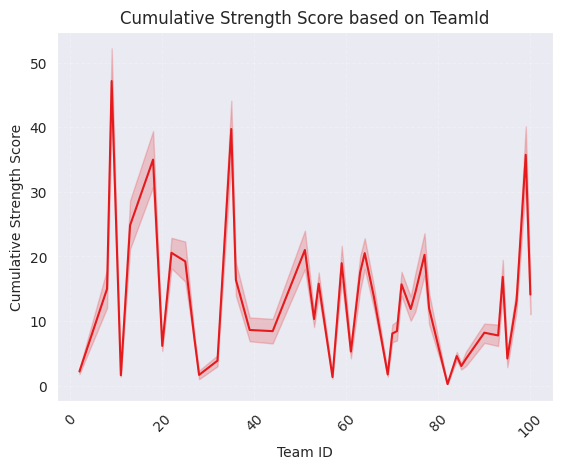

In [95]:
pandas_cumulative_strength_df = cumulative_strength_df.toPandas()
sns.set_palette("Set1")
fig, ax = plt.subplots()
sns.lineplot(data=pandas_cumulative_strength_df, x='teamId', y='cumulative_strength', ax=ax)

ax.set_xlabel('Team ID')
ax.set_ylabel('Cumulative Strength Score')
ax.set_title('Cumulative Strength Score based on TeamId')

plt.xticks(rotation=45)
ax.grid(True, linestyle='--', alpha=0.2)
plt.show()


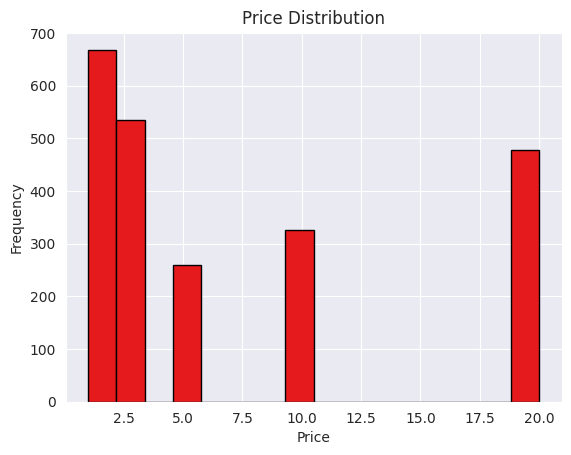

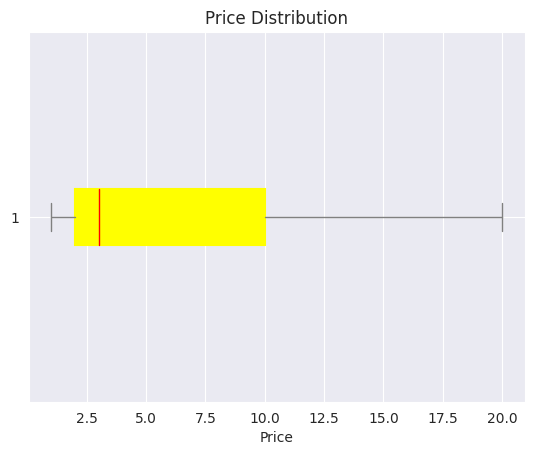

In [97]:
#Histogram of the price distribution

import matplotlib.pyplot as plt
import numpy as np

price_data = np.array(team_user_buying_df.select('price').collect())
plt.hist(price_data, bins='auto', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

#Box of the price distribution
fig, ax = plt.subplots()
box_colors = ['lightblue']
whisker_colors = ['grey']
bp = ax.boxplot(price_data, vert=False, patch_artist=True, boxprops=dict(facecolor=box_colors[0]),
                whiskerprops=dict(color=whisker_colors[0]), capprops=dict(color=whisker_colors[0]),
                medianprops=dict(color='red'))
ax.set_xlabel('Price')
ax.set_title('Price Distribution')
for box in bp['boxes']:
    box.set(color='yellow', linewidth=1.5)



In [53]:
#stacked bar chart

import pyspark.sql.functions as F
import plotly.graph_objs as go
from pyspark.sql.types import FloatType

# Calculate percentage of age groups by team level
df_perc = user_session_data.groupby("teamLevel", "platformType").count() \
            .withColumn("total", F.sum("count").over(Window.partitionBy("teamLevel"))) \
            .withColumn("percentage", F.col("count")/F.col("total")*100) \
            .withColumn("percentage", F.round(F.col("percentage"), 2)) \
            .orderBy("platformType")

team_levels = df_perc.select("teamLevel").distinct().rdd.flatMap(lambda x: x).collect()
data = []

for level in team_levels:
    temp_df = df_perc.filter(F.col("teamLevel") == level)
    trace = go.Bar(x=temp_df.select("platformType").rdd.flatMap(lambda x: x).collect(),
                   y=temp_df.select("percentage").rdd.flatMap(lambda x: x).collect(),
                   name=level, orientation='v', text=temp_df.select("percentage").rdd.flatMap(lambda x: x).collect(),
                   textposition='auto')
    data.append(trace)

layout = go.Layout(title="Percentage of Platform Type with Different Team Levels",
                   xaxis=dict(title="Platform Type"),
                   yaxis=dict(title="Percentage"),
                   barmode="stack")
fig = go.Figure(data=data, layout=layout)
fig.show()


In [ ]:
# Histogram of bought items by Users
DF.hist(column='total_purchases_amount', bins=10)

Machine Learning using PySpark

In [54]:
import pyspark.sql.functions as f
from pyspark.sql import Window
from pyspark.sql.functions import rank,sum,col

In [56]:
#preparing data

window = Window.rowsBetween(Window.unboundedPreceding,Window.unboundedFollowing)
combined_data_df = spark.read.csv("/content/combined-data.csv", header=True, inferSchema=True)
combined_data_df_na_removed = combined_data_df.na.drop()                        
combined_data_df_hitter = combined_data_df\
                          .withColumn('total',sum(f.col('avg_price')).over(window))\
                          .withColumn("spender", f.when(f.col("avg_price") > 5,1).otherwise(0))

grouped_userId_combined_data_df  = combined_data_df_hitter.groupby("userId")\
                                  .agg(f.sum("count_gameclicks").alias('count_gameclicks_total'), 
                                       f.sum("count_hits").alias("count_hits_total"), 
                                       f.sum("avg_price").alias("avg_price_total"))\
                                  .withColumn('Percent',f.col('count_hits_total')*100/f.col('count_gameclicks_total'))\
                                  .withColumn("hitter", f.when(f.col("Percent") > 10, 1).otherwise(0))\
                                  
combined_data_ML = combined_data_df_hitter.alias("combined_data_df_hitter").join(grouped_userId_combined_data_df.alias("grouped_userId_combined_data_df"),\
                           f.col("combined_data_df_hitter.userId") == f.col("grouped_userId_combined_data_df.userId"),"inner")\

                          
combined_data_ML.show()


+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|             total|spender|userId|count_gameclicks_total|count_hits_total|avg_price_total|           Percent|hitter|
+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+
|   812|         5648|        1|     android|              69|         8|       NULL|     NULL|10179.410000000002|      0|   812|                   669|              74|           null|11.061285500747385|     1|
|  1658|         5649|        1|      iphone|              31|         5|       NULL|     NULL|10179.410000000002|      0|  1658|                   403|

In [ ]:
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol='platformType', outputCol='platformType_indexed')
indexer_model = indexer.fit(combined_data_ML)
combined_data_ML1 = indexer_model.transform(combined_data_ML)
combined_data_ML1.show()

In [ ]:
combined_data_ML1 = combined_data_ML1.fillna({'avg_price_total':'0'})
combined_data_ML1.show()

In [ ]:
combined_data_ML1.printSchema()

Classification

In [60]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Source
from pyspark.ml import Pipeline

from pyspark.ml.feature import IndexToString
from pyspark.ml.classification import DecisionTreeClassifier


In [64]:
# Drop unnecessary columns
data = combined_data_ML1.drop("userId", "userSessionId", "count_buyId","total", "count_gameclicks", "count_hits", "Percent", "platformType")

# Create a VectorAssembler to combine the features into a single vector
assembler = VectorAssembler(inputCols=["count_gameclicks_total", "count_hits_total", "teamLevel", "platformType_indexed","hitter"], outputCol="features")
data = assembler.transform(data)

In [ ]:
# Split the dataset into training and testing sets
train_data, test_data = data.randomSplit([0.7, 0.3])

# Train the decision tree classifier
dt = DecisionTreeClassifier(labelCol="spender", featuresCol="features")
dt_model = dt.fit(train_data)

# Make predictions on the testing set
predictions = dt_model.transform(test_data)

# Evaluate the performance of the model using MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol="spender", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)

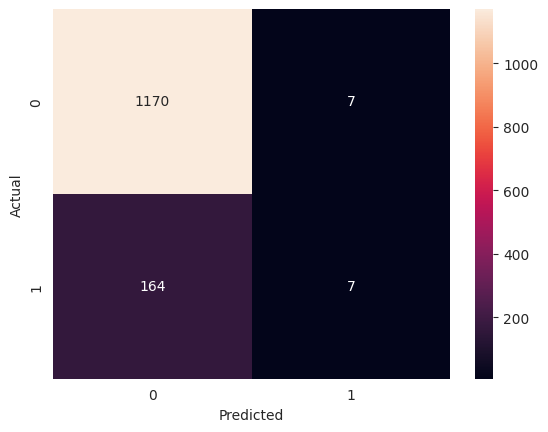

In [66]:
# Plot the confusion matrix
y_true = predictions.select(['spender']).collect()
y_pred = predictions.select(['prediction']).collect()
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [67]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.linalg import Vectors
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [68]:
from pyspark.ml.classification import NaiveBayes


In [ ]:
train_data, test_data = data.randomSplit([0.7, 0.3])

# Train the Naive Bayes classifier
nb = NaiveBayes(labelCol="spender", featuresCol="features")
nb_model = nb.fit(train_data)

predictions = nb_model.transform(test_data)

evaluator = MulticlassClassificationEvaluator(labelCol="spender", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)

# Plot the confusion matrix
y_true = predictions.select("spender").toPandas()
y_pred = predictions.select("prediction").toPandas()
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Clustering

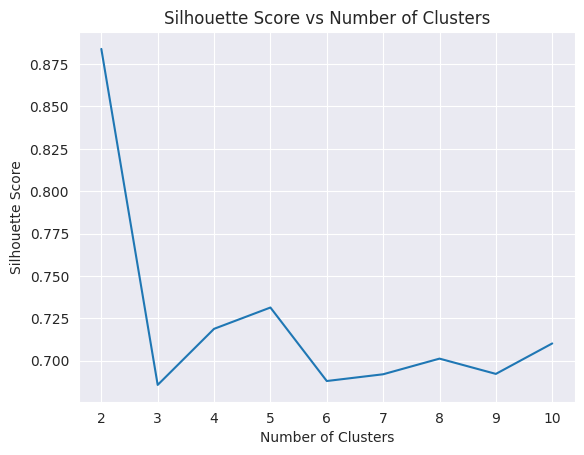

In [72]:
# Import necessary libraries
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import ClusteringEvaluator
import matplotlib.pyplot as plt
import pandas as pd

data1 = combined_data_ML1.drop("userId", "userSessionId", "count_buyId", "count_gameclicks", "total","count_hits", "avg_price_total", "Percent", "platformType")
featuresUsed = ["platformType_indexed","teamLevel","hitter","spender", "count_gameclicks_total","count_hits_total"]

# Create a VectorAssembler to combine the features into a single vector
assembler = VectorAssembler(inputCols=["count_gameclicks_total", "count_hits_total", "teamLevel", "platformType_indexed","hitter"], outputCol="features")
data1 = assembler.transform(data1)

from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol="features",
						outputCol="scaledFeatures",
						withStd=True,
						withMean=True)
scalerModel = scaler.fit(data1)
data1 = scalerModel.transform(data1)

#computing silhouette score for models

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans().setK(k).setSeed(1)
    model = kmeans.fit(data1)
    predictions = model.transform(data1)
    evaluator = ClusteringEvaluator()
    score = evaluator.evaluate(predictions)
    silhouette_scores.append(score)

# Plot silhouette scores vs number of clusters
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.show()





In [73]:
#K-MEANS clustering

featuresUsed = ["platformType_indexed","teamLevel","hitter","spender", "count_gameclicks_total","avg_price_total","count_hits_total"]

from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=featuresUsed, outputCol="features_unscaled")
assembled_feature = assembler.transform(combined_data_ML1)

scaler = StandardScaler(inputCol="features_unscaled", outputCol="features", withStd=True, withMean=True)
scalerModel = scaler.fit(assembled_feature)
scaledData = scalerModel.transform(assembled_feature)

scaledDataFeat = scaledData.select("features","teamLevel", "platformType_indexed","count_gameclicks_total","avg_price_total","count_hits_total","spender","hitter")
scaledDataFeat.persist()


### TRAIN KMEANS MODEL WITH 5 CLusters
kmeans = KMeans(k=5, seed=1)
model = kmeans.fit(scaledDataFeat)
transformed = model.transform(scaledDataFeat)

## GET CENTERIODS
centers = model.clusterCenters()


In [75]:
centers

[array([-0.15907806, -0.03636503,  0.56003647, -0.37215053, -0.21732124,
        -0.1600847 , -0.17990985]),
 array([ 0.14750323, -0.45360234,  0.28719822, -0.13745186,  2.53035053,
        -0.0548085 ,  2.51408176]),
 array([ 2.3602386 ,  0.00424472, -0.20124819, -0.29208106, -0.24600105,
        -0.39919541, -0.26102093]),
 array([-0.75155886,  0.30198308,  0.3903432 ,  2.56166   , -0.20978065,
         1.79067607, -0.10433334]),
 array([-0.1950345 ,  0.11889969, -1.78521144, -0.35844995, -0.32858808,
        -0.45484407, -0.47903675])]

In [74]:
from pyspark.sql.functions import *
from pyspark.ml.clustering import BisectingKMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import ClusteringEvaluator
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

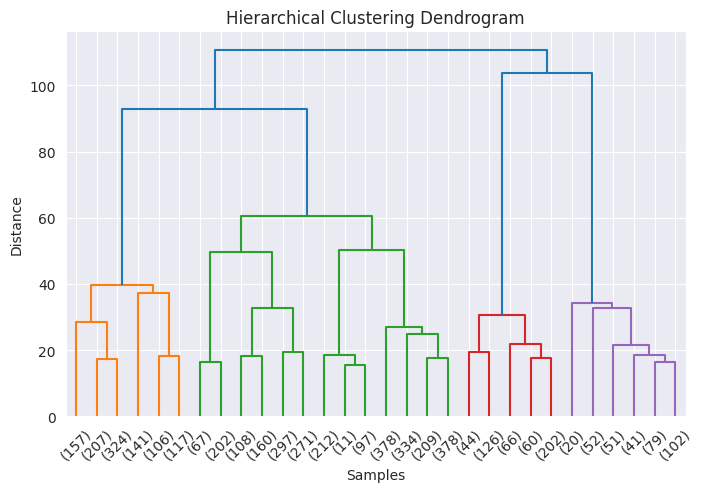

In [78]:
#Hierarchical Clustering

k = 5  
bkm = BisectingKMeans(k=k, seed=123)
model = bkm.fit(scaledData)


#dendrogram
vectors = scaledData.select('features').rdd.map(lambda x: x[0]).collect()
Z = linkage(vectors, method='ward')
fig = plt.figure(figsize=(8, 5))
dn = dendrogram(Z, truncate_mode='lastp')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()